### **IMPORT LIBRARY**

In [ ]:
import os
import tensorflow as tf
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
print(tf.__version__)
tf.test.gpu_device_name()

2.15.0


''

### **IMPORT DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DATASET_PATH = '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset'

os.listdir(DATASET_PATH)

['train', 'valid', 'test']

### **IMAGE PREPROCESSING**

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/valid',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 1155 images belonging to 7 classes.
Found 593 images belonging to 7 classes.


In [ ]:
# Create variabel x_train and y_train
x_train, y_train = train_generator.next()

# Create variabel x_val and y_val
x_val, y_val = validation_generator.next()

In [ ]:
x_train.shape

(32, 224, 224, 3)

### **LOAD MODEL**

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 2917447 (11.13 MB)
Trainable params: 28833

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      epochs=15,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/15
37/37 [==============================] - 551s 15s/step - loss: 0.5077 - accuracy: 0.8424 - val_loss: 0.1708 - val_accuracy: 0.9342
Epoch 2/15
37/37 [==============================] - 100s 3s/step - loss: 0.1500 - accuracy: 0.9541 - val_loss: 0.2281 - val_accuracy: 0.9275
Epoch 3/15
37/37 [==============================] - 103s 3s/step - loss: 0.1128 - accuracy: 0.9636 - val_loss: 0.1933 - val_accuracy: 0.9460
Epoch 4/15
37/37 [==============================] - 104s 3s/step - loss: 0.0788 - accuracy: 0.9723 - val_loss: 0.1688 - val_accuracy: 0.9444
Epoch 5/15
37/37 [==============================] - 101s 3s/step - loss: 0.0895 - accuracy: 0.9766 - val_loss: 0.1996 - val_accuracy: 0.9342
Epoch 6/15
37/37 [==============================] - 101s 3s/step - loss: 0.0645 - accuracy: 0.9740 - val_loss: 0.2127 - val_accuracy: 0.9427
Epoch 7/15
37/37 [==============================] - 102s 3s/step - loss: 0.0473 - accuracy: 0.9870 - val_loss: 0.1668 - val_accuracy: 0.9460
Epoch 8/15
3

### **EVALUASI**

In [ ]:
results = pd.DataFrame(history.history)
results.tail()

,loss,accuracy,val_loss,val_accuracy
10,0.051550,0.980087,0.161295,0.966273
11,0.059654,0.979221,0.235108,0.932546
12,0.048910,0.983550,0.170966,0.959528
13,0.048788,0.985281,0.230380,0.942664
14,0.059438,0.980952,0.191974,0.951096


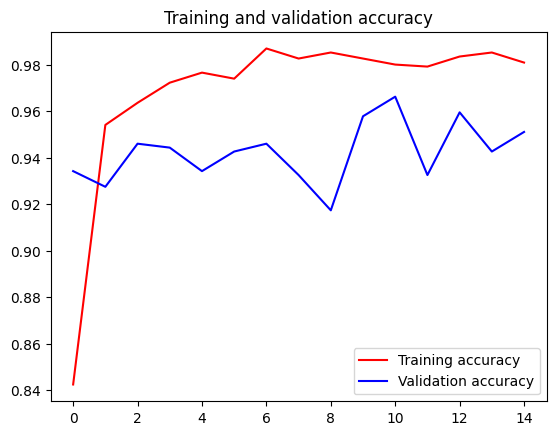

<Figure size 640x480 with 0 Axes>

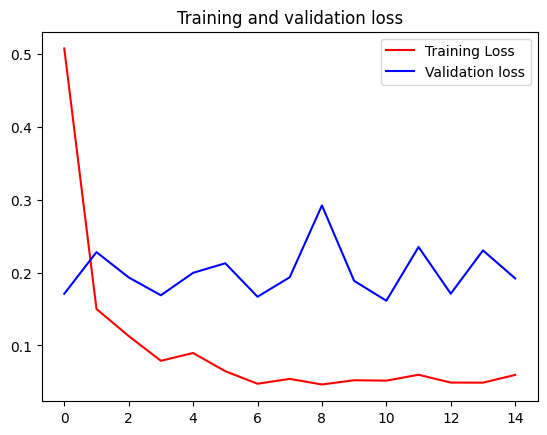

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
class_names = sorted(os.listdir('/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/train'))
print(class_names)

['CANARY', 'GOLDEN PARAKEET', 'HYACINTH MACAW', 'JANDAYA PARAKEET', 'MILITARY MACAW', 'SAMATRAN THRUSH', 'SCARLET MACAW']


In [ ]:
testing = [
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/CANARY/1.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/CANARY/2.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/CANARY/3.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/MILITARY MACAW/1.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/MILITARY MACAW/2.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/MILITARY MACAW/3.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/JANDAYA PARAKEET/1.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/JANDAYA PARAKEET/2.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/JANDAYA PARAKEET/3.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/HYACINTH MACAW/1.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/HYACINTH MACAW/2.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/HYACINTH MACAW/3.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/SCARLET MACAW/1.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/SCARLET MACAW/2.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/SCARLET MACAW/3.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/SAMATRAN THRUSH/1.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/SAMATRAN THRUSH/2.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/SAMATRAN THRUSH/3.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/GOLDEN PARAKEET/1.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/GOLDEN PARAKEET/2.jpg',
         '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test/GOLDEN PARAKEET/3.jpg'
         ]

1/1 [==============================] - 0s 52ms/step


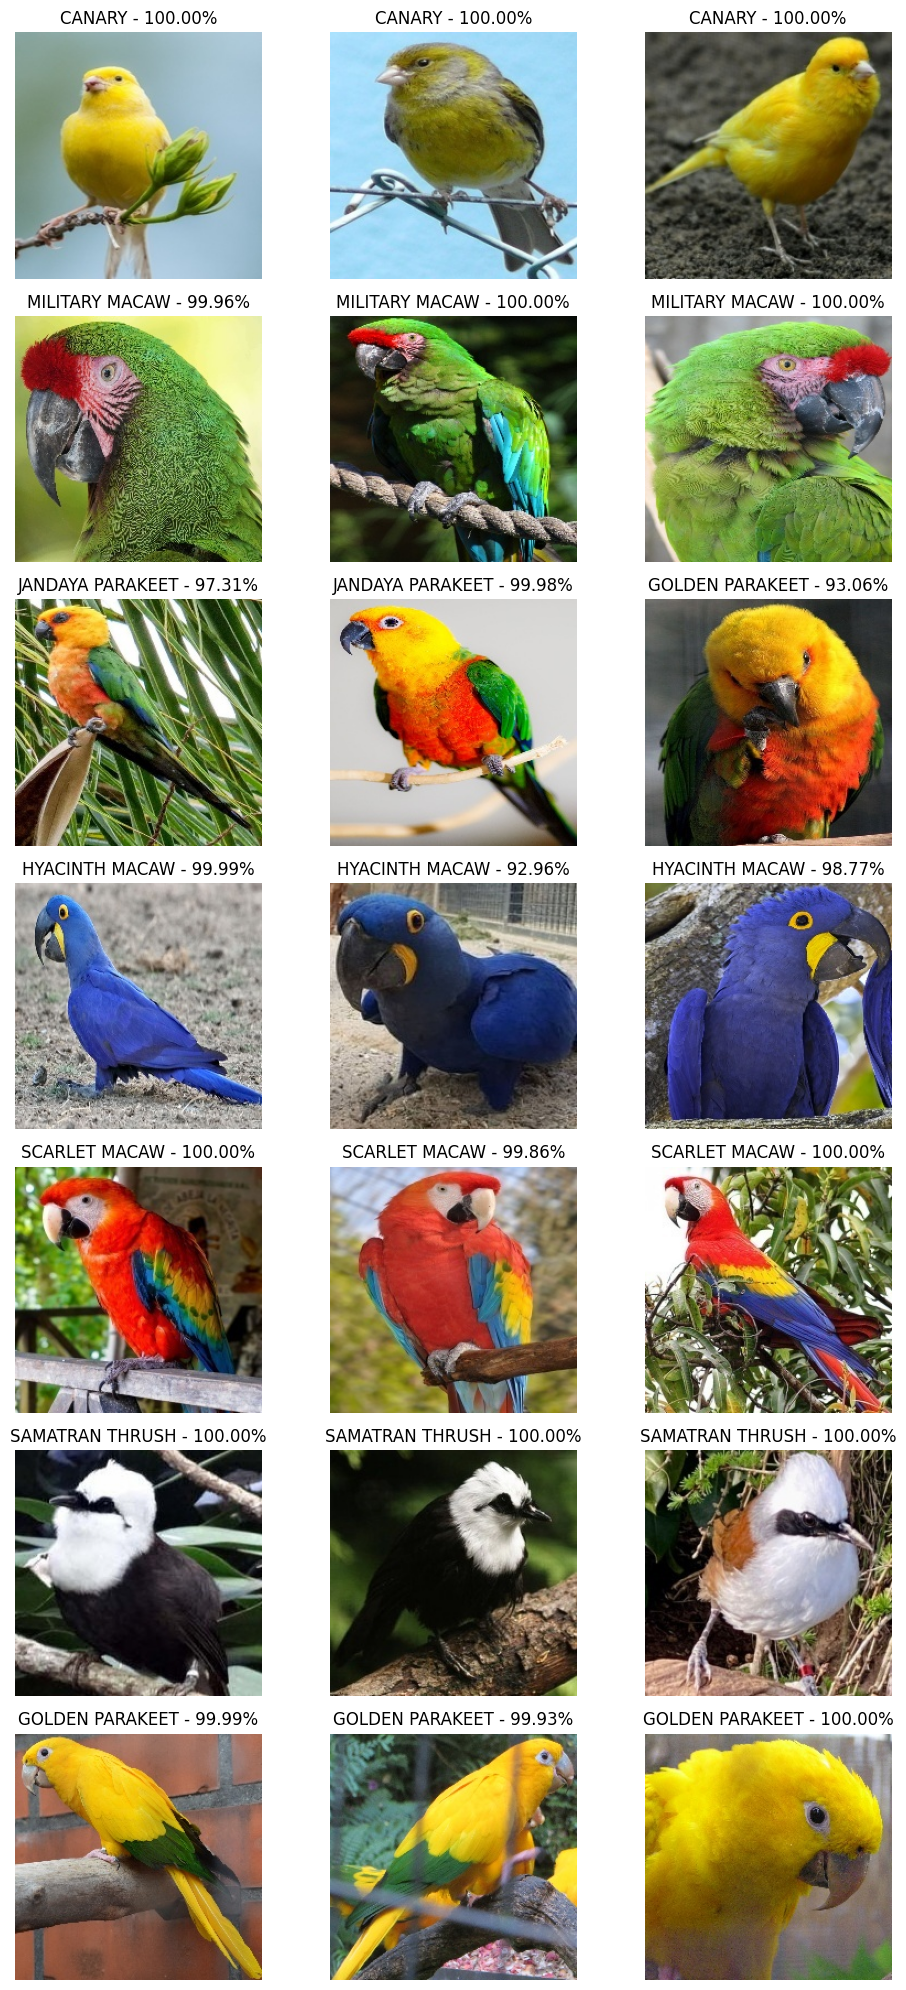

In [ ]:
from tensorflow.keras.preprocessing import image
import math

def load_and_prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, color_mode="rgb", target_size=target_size, interpolation="nearest")
    img_array = image.img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def predict_image(model, img_array):
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = max(prediction[0])
    return predicted_class, confidence

def display_images_with_predictions(img_paths, model, class_names, num_columns=3):
    num_rows = math.ceil(len(img_paths) / num_columns)
    plt.figure(figsize=(10, 20))

    for i, path in enumerate(img_paths):
        img_array = load_and_prepare_image(path)
        predicted_class, confidence = predict_image(model, img_array)

        plt.subplot(num_rows, num_columns, i + 1)
        img = image.load_img(path, target_size=(224, 224))
        plt.imshow(img)
        plt.title(f"{class_names[predicted_class]} - {confidence * 100:.2f}%")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_images_with_predictions(testing, model, class_names)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

bird_dict = train_generator.class_indices
testing_dir = '/content/gdrive/MyDrive/Capstone Kicaw/ML/dataset/test'

def load_and_prepare_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    return tf.expand_dims(img_array, 0)

def predict_bird(model, img_array, bird_list):
    prediction = model(img_array)
    pred_idx = np.argmax(prediction)
    pred_bird = bird_list[pred_idx]
    pred_confidence = prediction[0][pred_idx] * 100
    return pred_bird, pred_confidence

def evaluate_predictions(test_dir, dict, model):
    for bird, _ in bird_dict.items():
        correct_count = 0
        bird_path = os.path.join(test_dir, bird)
        images_list = os.listdir(bird_path)

        for image in images_list:
            img_path = os.path.join(bird_path, image)
            img_array = load_and_prepare_image(img_path)
            pred_bird, _ = predict_bird(model, img_array, list(bird_dict.keys()))

            if pred_bird == bird:
                correct_count += 1

        print(f'{bird} Predictions --> {correct_count}/{len(images_list)} correct')

evaluate_predictions(testing_dir, bird_dict, model)

CANARY Predictions --> 5/5 correct
GOLDEN PARAKEET Predictions --> 5/5 correct
HYACINTH MACAW Predictions --> 5/5 correct
JANDAYA PARAKEET Predictions --> 4/5 correct
MILITARY MACAW Predictions --> 5/5 correct
SAMATRAN THRUSH Predictions --> 5/5 correct
SCARLET MACAW Predictions --> 5/5 correct


### **CONVERT TFLITE**

In [ ]:
save_path = '/content/gdrive/MyDrive/Capstone Kicaw/ML/'

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Menyimpan model TFLite
with open(save_path + 'bird_classification_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Menyimpan labels.txt
with open(save_path + 'labels.txt', 'w') as f:
    f.write('\n'.join(class_names))  # class_names adalah list nama kelas

### **CONVERT H5**

In [ ]:
import time
saved_model_path = "/content/gdrive/MyDrive/Capstone Kicaw/ML/bird_classification_model.h5"

model.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **TFLite** **Interpreter**

In [ ]:
import tensorflow as tf
import numpy as np

# Muat model TFLite
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Dapatkan detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Tes model dengan data input sembarang (contoh)
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

# Jalankan model
interpreter.invoke()

# Dapatkan hasil output
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


In [ ]:
import numpy as np

output = np.array([[8.5447103e-02, 3.4786575e-05, 7.9943126e-01, 4.0566190e-03,
                    1.1077877e-01, 2.3196392e-04, 1.9459665e-05]])

# Temukan indeks dengan nilai maksimum
predicted_class = np.argmax(output)
predicted_probability = np.max(output)

print(f'Kelas Prediksi: {predicted_class}, Probabilitas: {predicted_probability}')


Kelas Prediksi: 2, Probabilitas: 0.79943126
